
A Confirmation that all columns and cells are completely filled,there are no empty cells and data is in exact type :

feature_name          numbe_of_missing_values
LSOAcode2011                                             0
LSOAname                                                 0
YearendingDec1995                                        0
YearendingDec1996                                        0
YearendingDec1997                                        0
YearendingDec1998                                        0
YearendingDec1999                                        0
YearendingDec2000                                        0
YearendingDec2001                                        0
YearendingDec2002                                        0
YearendingDec2003                                        0
YearendingDec2004                                        0
YearendingDec2005                                        0
YearendingDec2006                                        0
Yearendin

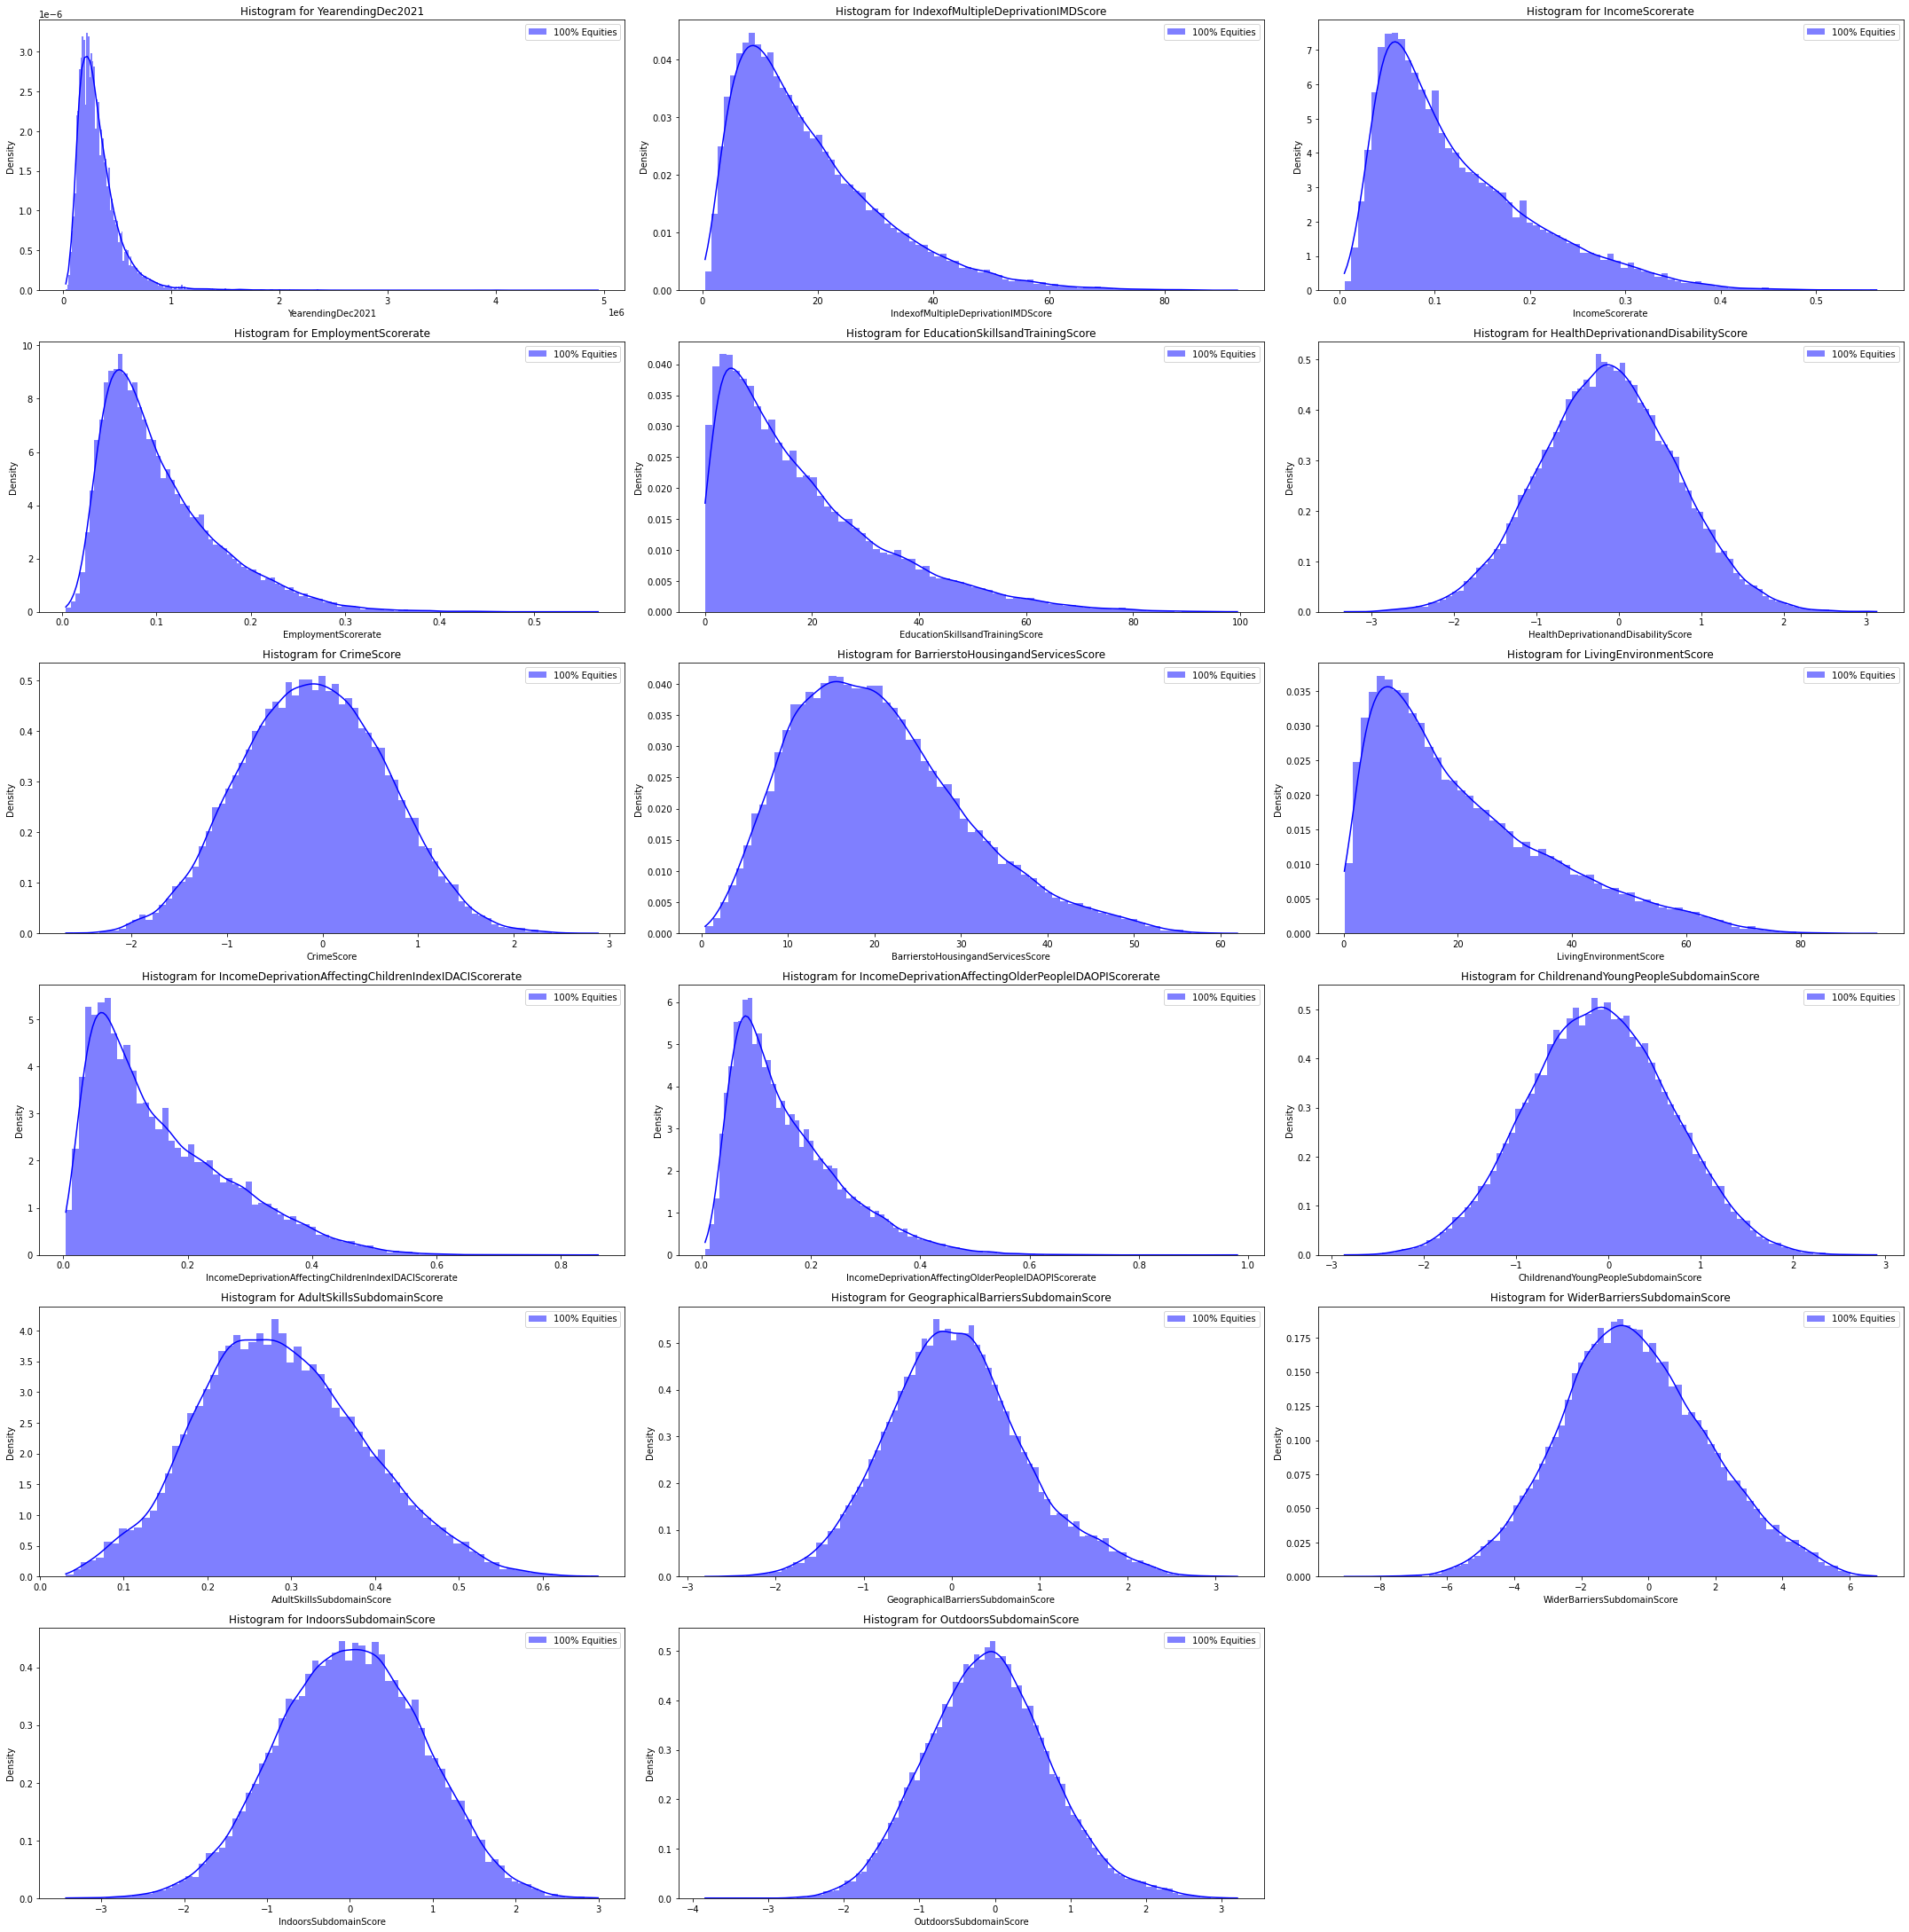

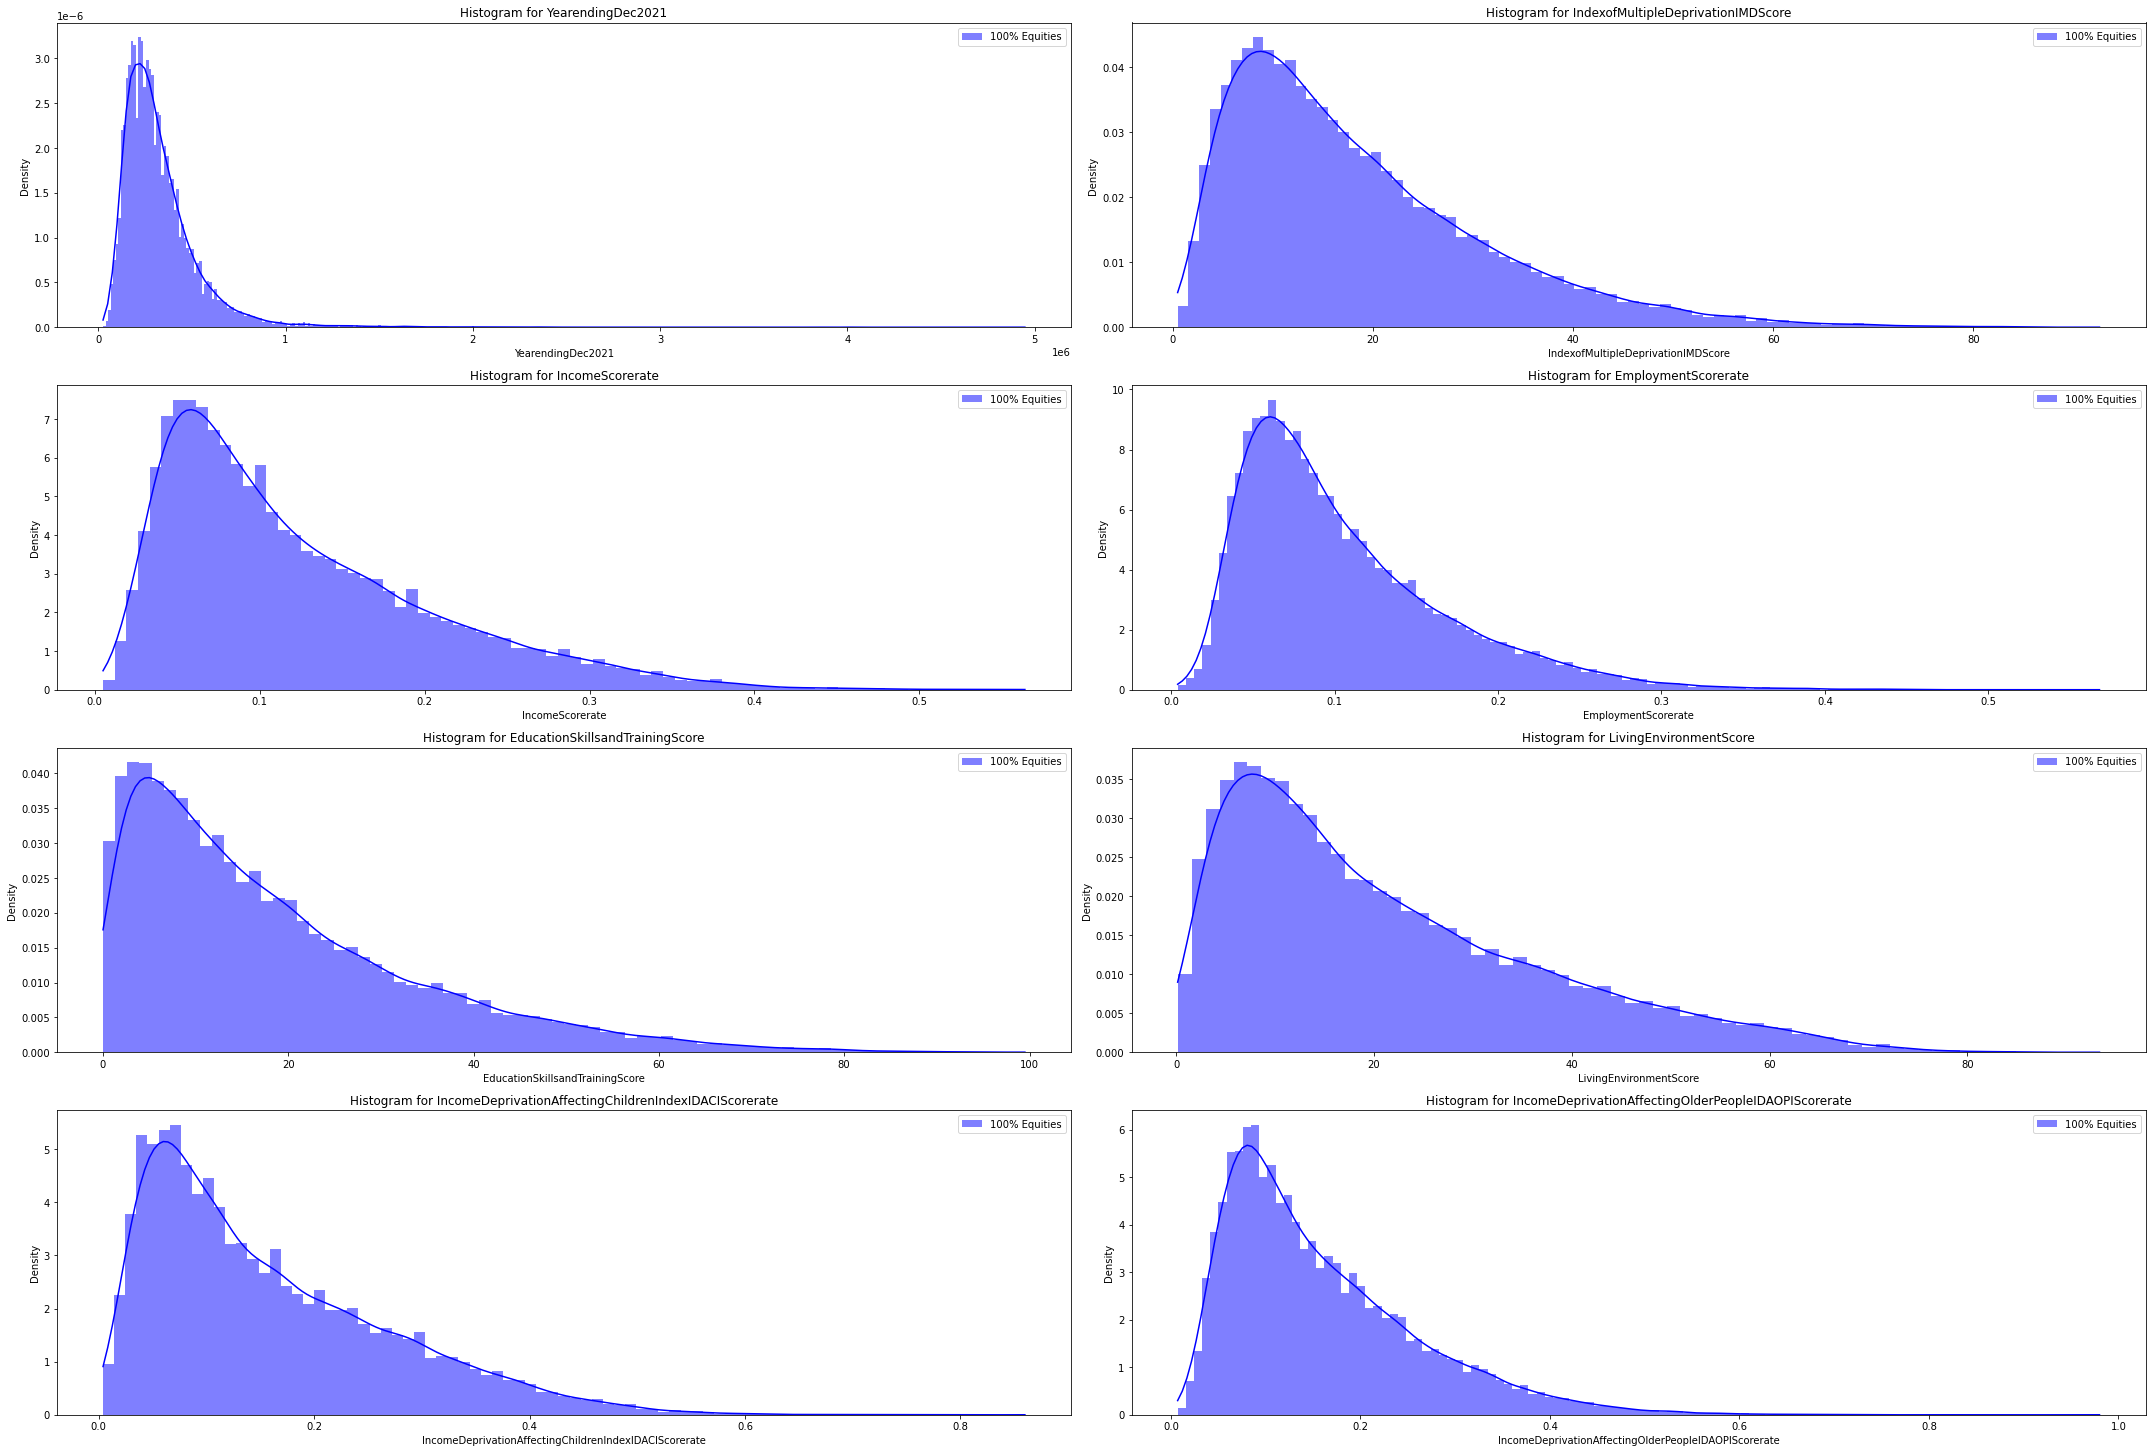

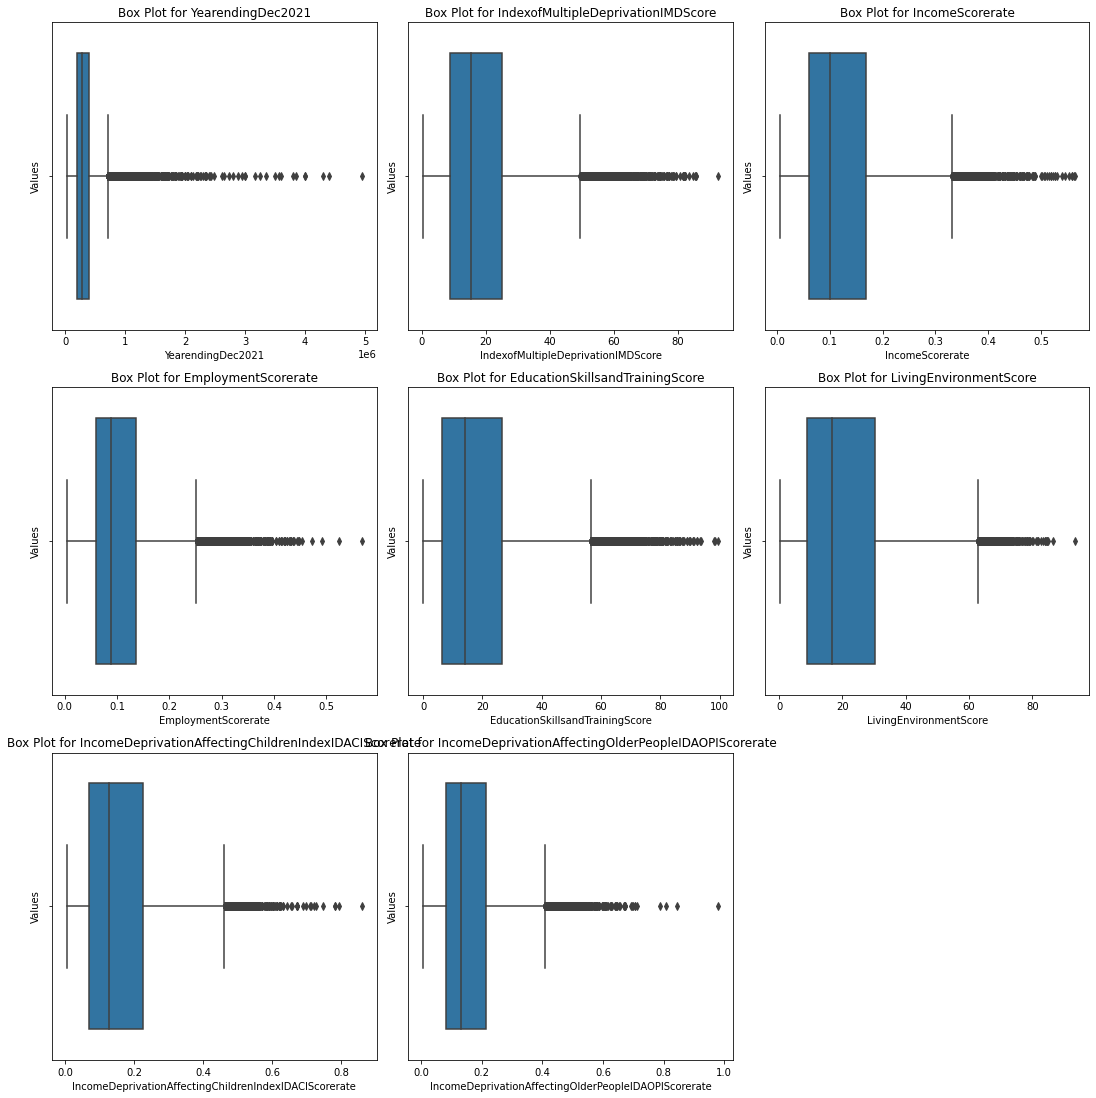

upper limit: 555856.4835710303
lower limit: 105065.08208264972
before removing outliers: 28003
after removing outliers: 24303
outliers: 3700


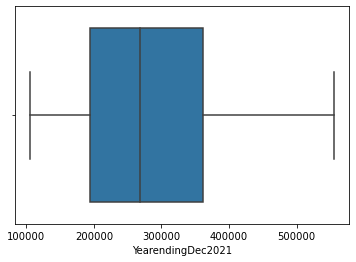

Column: YearendingDec2021
Upper limit: 781252.1843152206
Lower limit: -120330.61866154056
Before removing outliers: 28003
After removing outliers: 27085
Outliers: 918


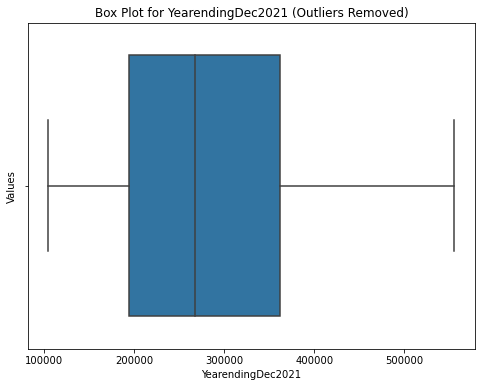

Column: IndexofMultipleDeprivationIMDScore
Upper limit: 44.3717728985898
Lower limit: -6.884198300103456
Before removing outliers: 27085
After removing outliers: 25763
Outliers: 1322


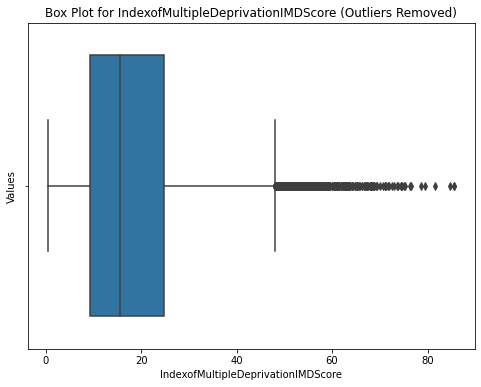

Column: IncomeScorerate
Upper limit: 0.25101556352420434
Lower limit: -0.020733686413619057
Before removing outliers: 25763
After removing outliers: 24529
Outliers: 1234


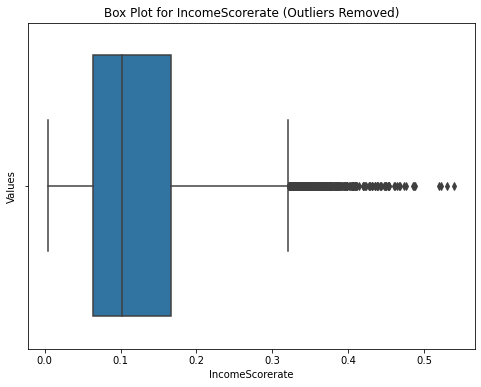

Column: EmploymentScorerate
Upper limit: 0.18301244319707383
Lower limit: 0.003054497974600112
Before removing outliers: 24529
After removing outliers: 23467
Outliers: 1062


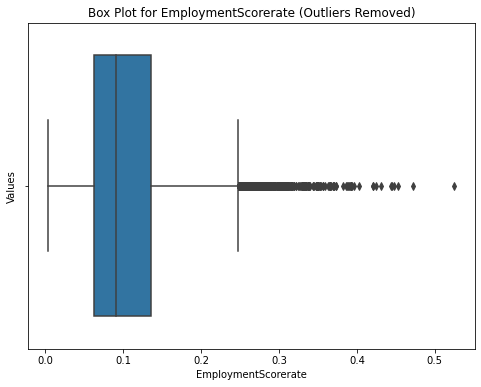

Column: EducationSkillsandTrainingScore
Upper limit: 38.44185406649006
Lower limit: -7.973845202979659
Before removing outliers: 23467
After removing outliers: 22332
Outliers: 1135


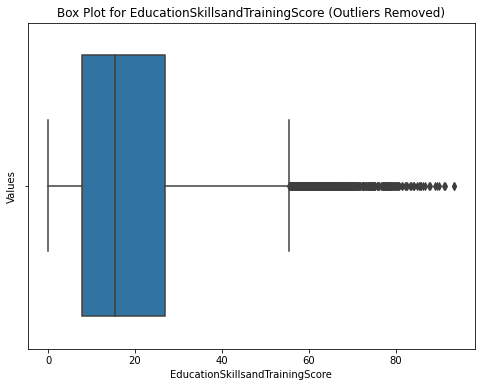

Column: LivingEnvironmentScore
Upper limit: 49.275120671891266
Lower limit: -10.106696706281326
Before removing outliers: 22332
After removing outliers: 21120
Outliers: 1212


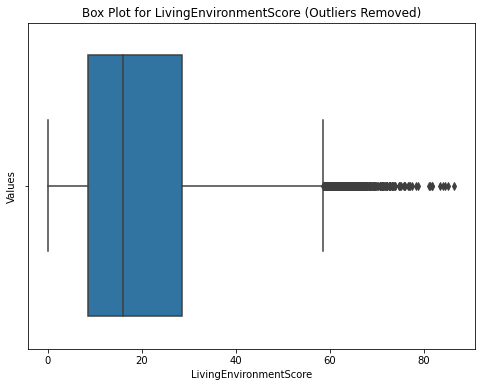

Column: IncomeDeprivationAffectingChildrenIndexIDACIScorerate
Upper limit: 0.2775945594331721
Lower limit: -0.032878650342264046
Before removing outliers: 21120
After removing outliers: 20126
Outliers: 994


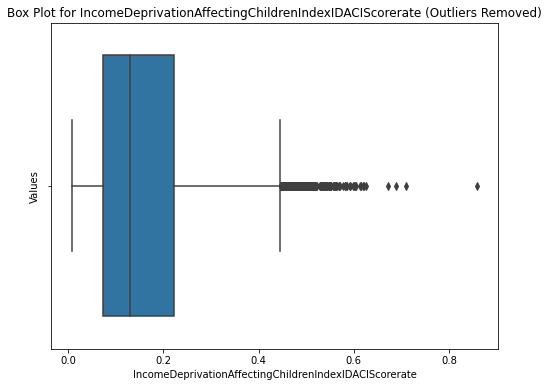

Column: IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate
Upper limit: 0.25496169662848756
Lower limit: -0.010487682914882931
Before removing outliers: 20126
After removing outliers: 19258
Outliers: 868


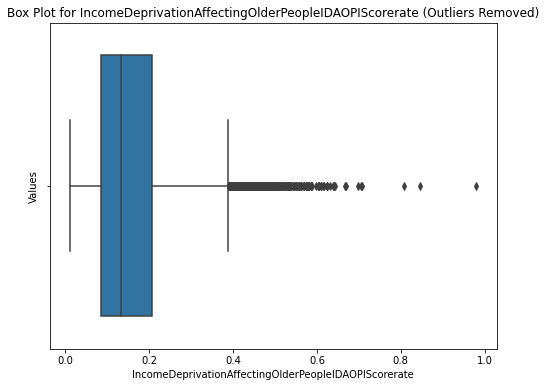

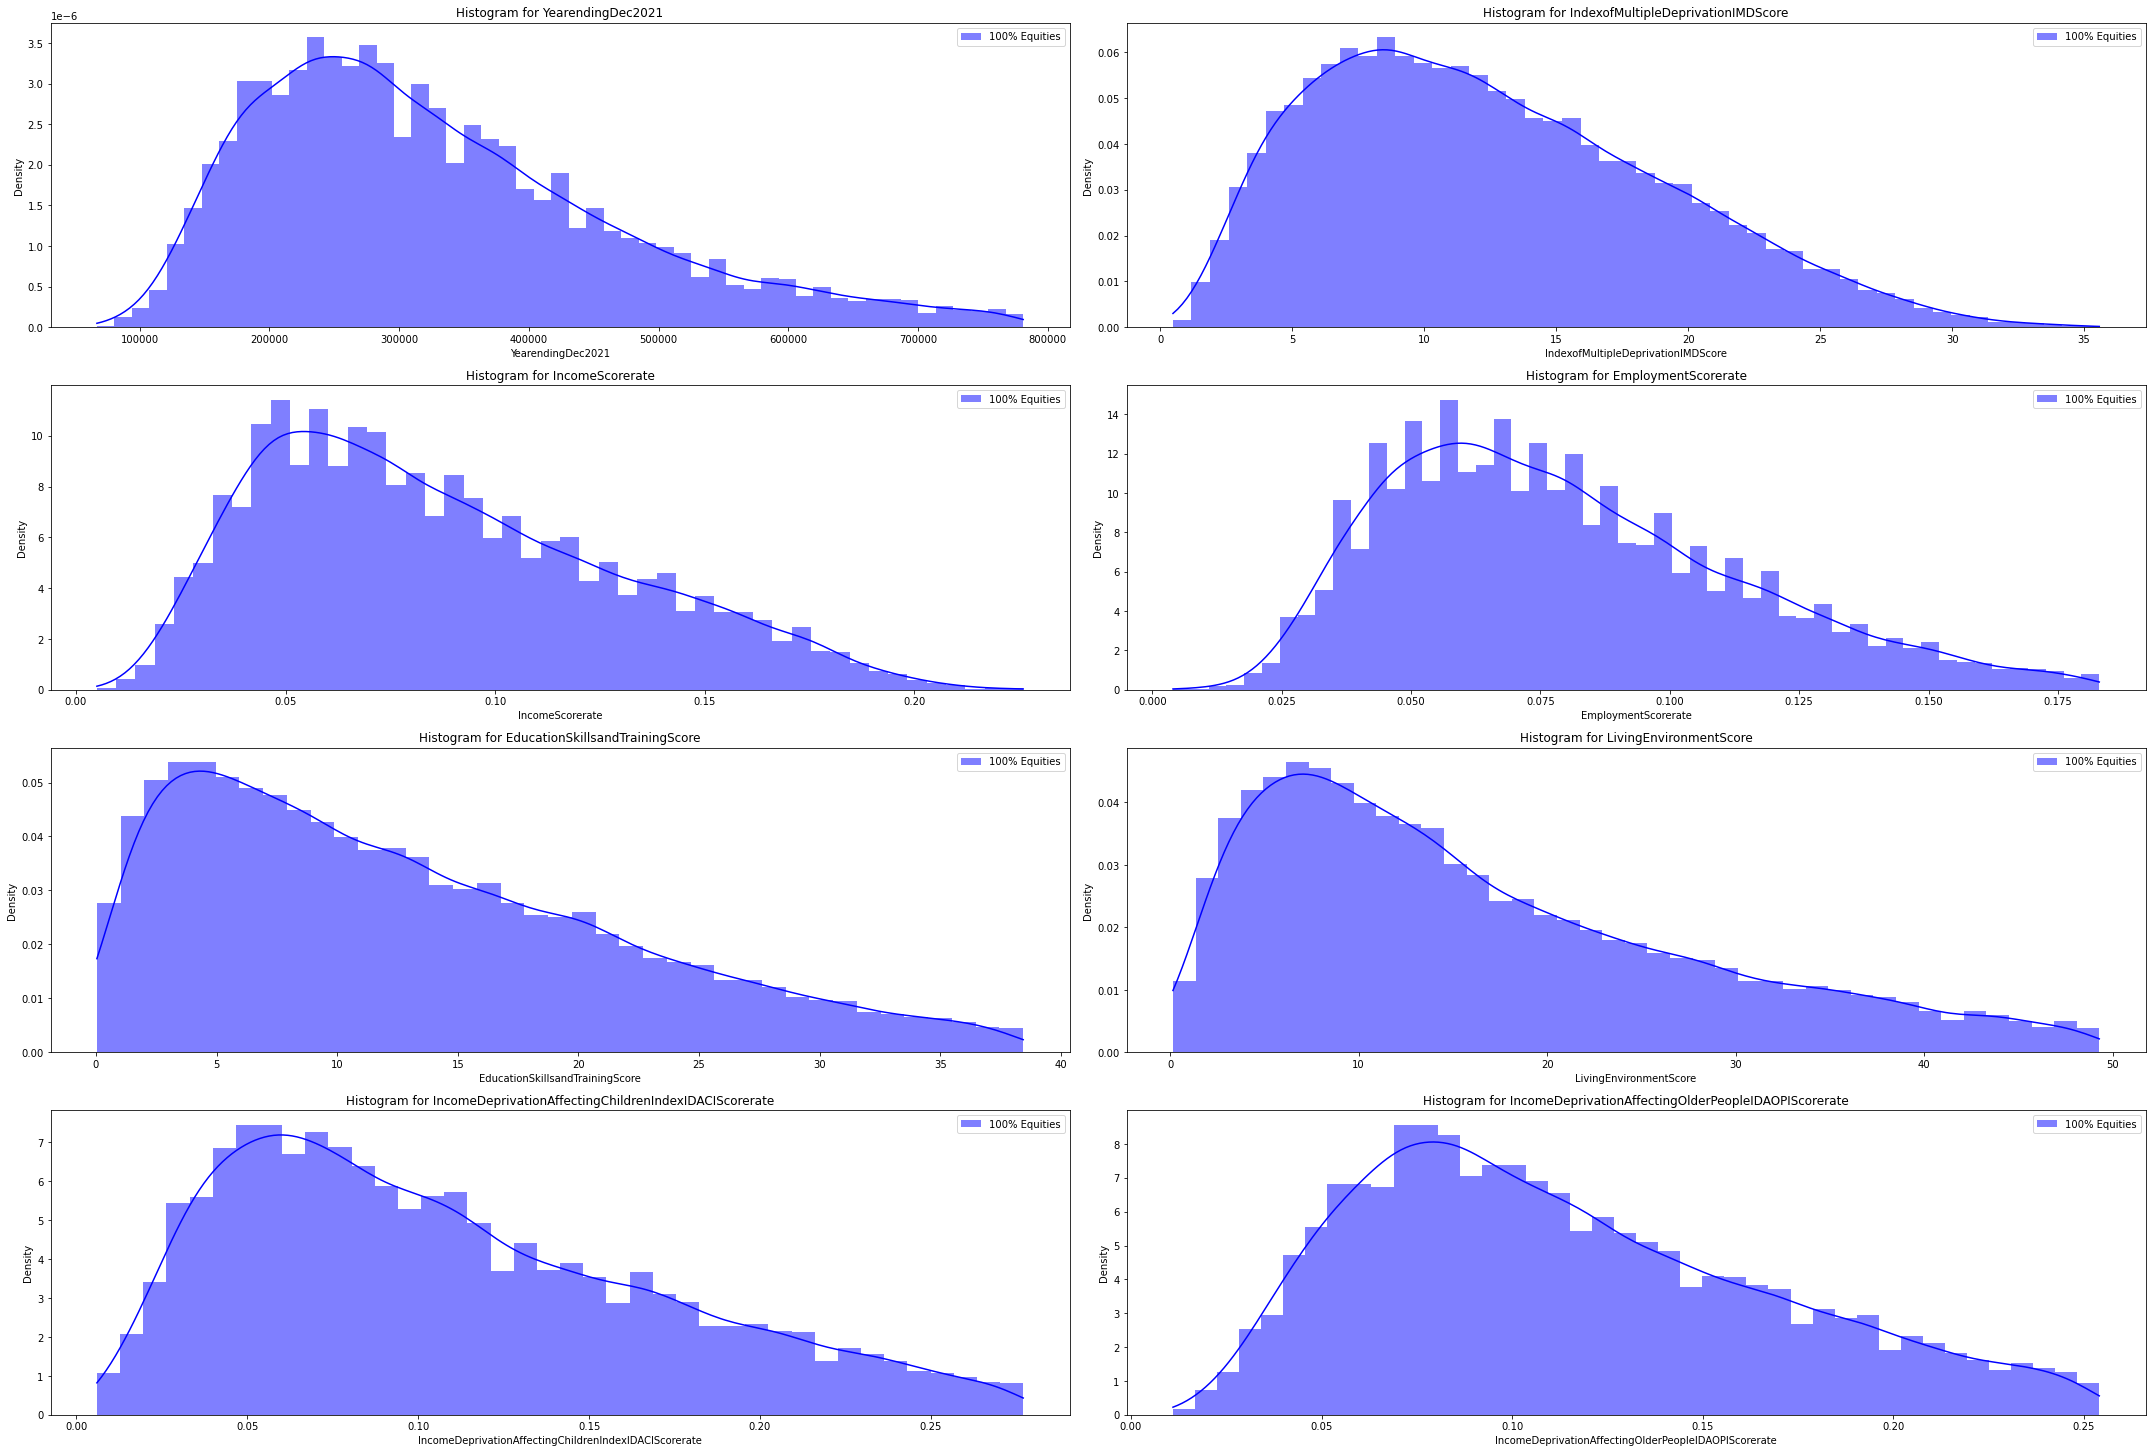

finished preprocessing.....


In [1]:
#Run preprocessing Notebook
#To see the sets in preprocessing please view preprocessing notebook
%run hpp_preprocessing.ipynb
#The variables we would use from this notebook are featuresNormalized (contains all features normalized) & dfp (normalized dataframe)

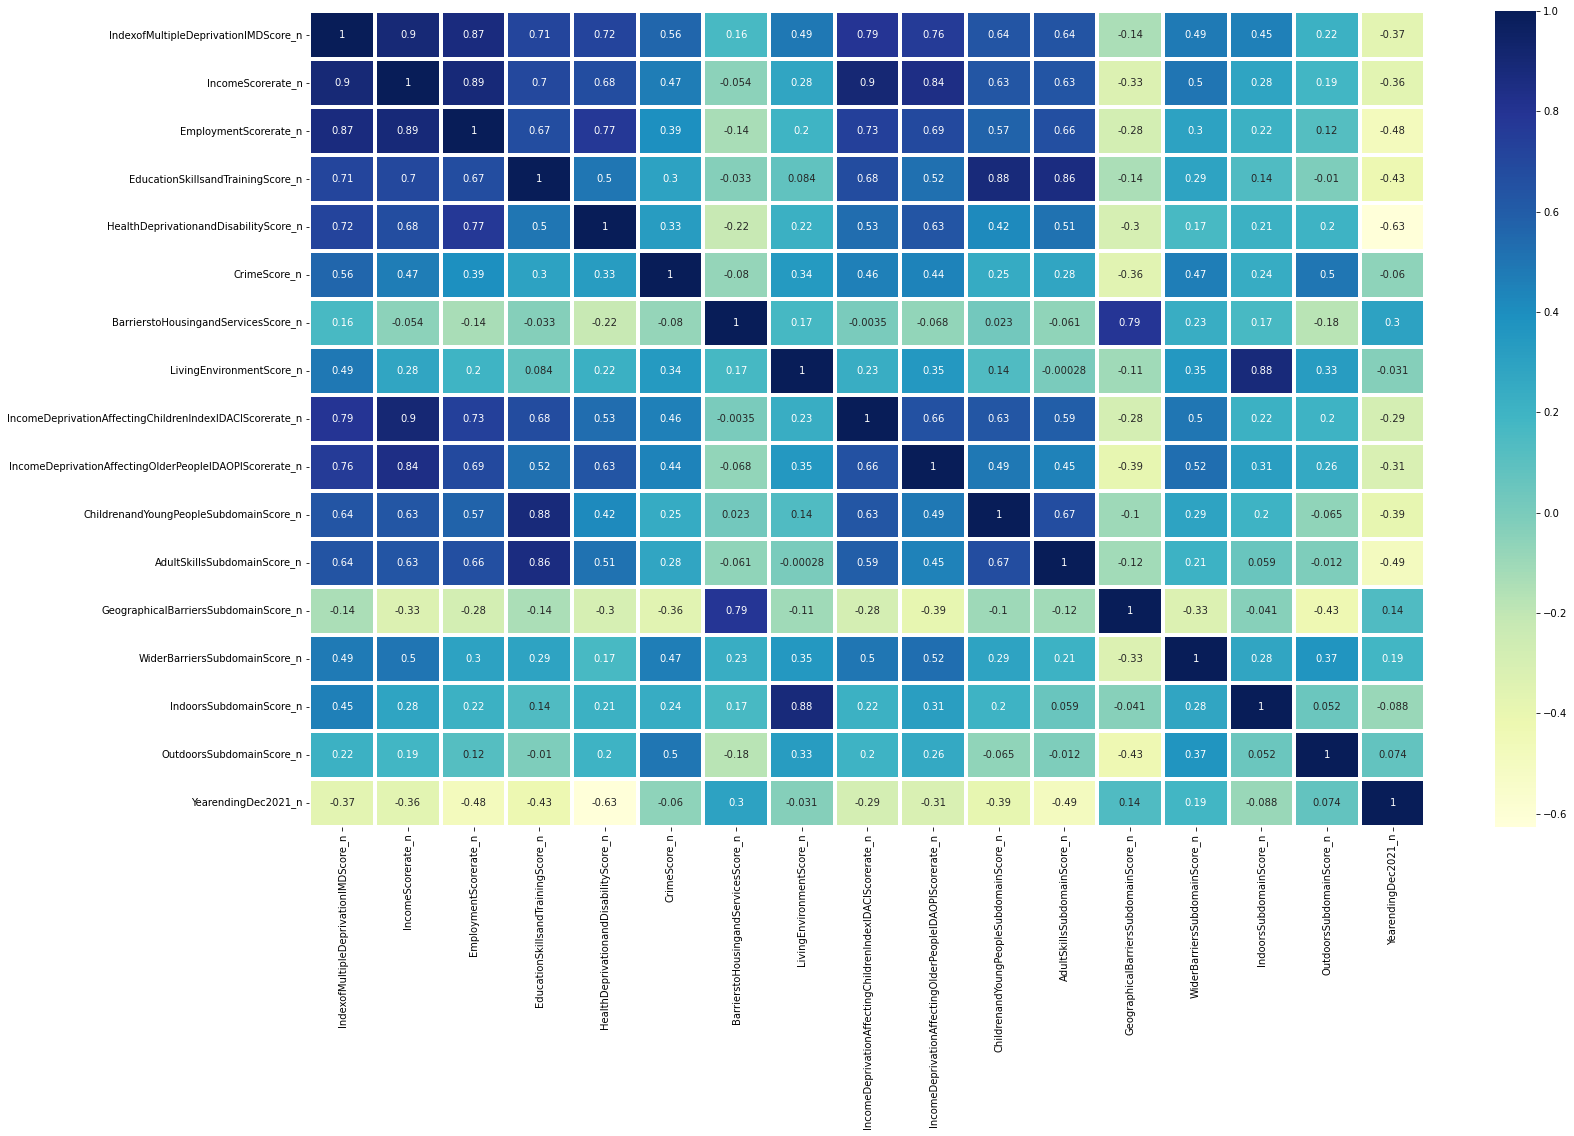

<Figure size 432x288 with 0 Axes>

In [2]:
#We use a correlation heatmap to visualize the data
ftrs = ['IndexofMultipleDeprivationIMDScore_n', 'IncomeScorerate_n', 'EmploymentScorerate_n',
     'EducationSkillsandTrainingScore_n', 'HealthDeprivationandDisabilityScore_n', 'CrimeScore_n',
     'BarrierstoHousingandServicesScore_n', 'LivingEnvironmentScore_n',
     'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n',
     'ChildrenandYoungPeopleSubdomainScore_n', 'AdultSkillsSubdomainScore_n', 'GeographicalBarriersSubdomainScore_n',
     'WiderBarriersSubdomainScore_n', 'IndoorsSubdomainScore_n', 'OutdoorsSubdomainScore_n','YearendingDec2021_n']
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(25,15)) 
# plotting correlation heatmap
dataplot = sb.heatmap(dfp[ftrs].corr(), cmap="YlGnBu", annot=True, linewidths=4)
  
# displaying heatmap
plt.show()
plt.savefig('Correlation_HeatMap.png', bbox_inches='tight', pad_inches=0.0)

In [3]:
#perform correlation
#We use a correlation heatmap to visualize the data
from scipy.stats import pearsonr
features = ['IndexofMultipleDeprivationIMDScore_n', 'IncomeScorerate_n', 'EmploymentScorerate_n',
     'EducationSkillsandTrainingScore_n', 'HealthDeprivationandDisabilityScore_n', 'CrimeScore_n',
     'BarrierstoHousingandServicesScore_n', 'LivingEnvironmentScore_n',
     'IncomeDeprivationAffectingChildrenIndexIDACIScorerate_n', 'IncomeDeprivationAffectingOlderPeopleIDAOPIScorerate_n',
     'ChildrenandYoungPeopleSubdomainScore_n', 'AdultSkillsSubdomainScore_n', 'GeographicalBarriersSubdomainScore_n',
     'WiderBarriersSubdomainScore_n', 'IndoorsSubdomainScore_n', 'OutdoorsSubdomainScore_n','YearendingDec2021_n']
columnsCorrelating = []
columnsNotCorrelating = []
for c in features:
    rvalue, pvalue = pearsonr(dfp[c],dfp['YearendingDec2021'])
    print('stat=%.3f, p=%.3f' %(rvalue,pvalue))
    
    #confidence level is 99%, alpha = 0.01
    alpha_half = 0.005
    if pvalue > 0.005:
        print('For correlation between '+c+' and Life Expectancy')
        print('Accept the null hypothesis: the conclusions are:')
        print('(i) correlation coefficient ,r value is equal to 0;')
        print('(ii) both variables are independent of each other;')
        print('(iii) both variables do not have any relationship;')
        columnsNotCorrelating.append(c)
    else:
        print('For correlation between '+c+' and Life Expectancy')
        print('Reject null hypothesis: the conclusions are:')
        print('(i) correlation coefficient ,r value is significantly different from 0;')
        print('(ii) both variables are dependent of each other;')
        print('(iii) both variables  have a relationship;')
        columnsCorrelating.append(c)
    print("\n")


stat=-0.369, p=0.000
For correlation between IndexofMultipleDeprivationIMDScore_n and Life Expectancy
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=-0.361, p=0.000
For correlation between IncomeScorerate_n and Life Expectancy
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=-0.482, p=0.000
For correlation between EmploymentScorerate_n and Life Expectancy
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=-0.428, p=0.000
For correlation between EducationSkillsandTrainingScore_n and Life Expecta